In [ ]:
pip install pandas matplotlib reportlab


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

df = pd.read_csv('cadastro_ies.CSV', encoding='ISO-8859-1', sep=';',low_memory=False)

df.dropna(inplace=True)

In [ ]:
print(df.head())

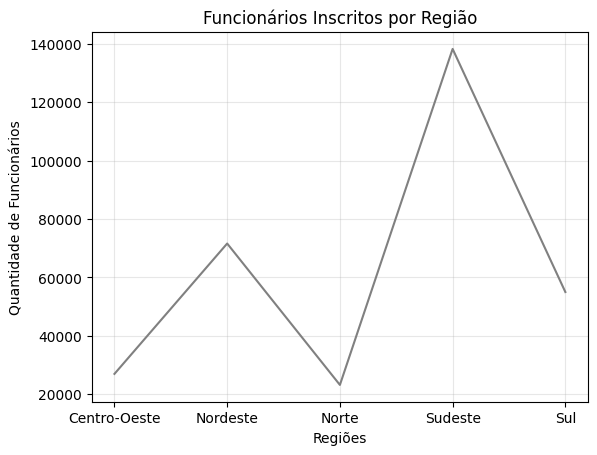

In [32]:
import matplotlib.pyplot as plt

cores = ['grey']  

qt_regiao = df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

plt.plot(qt_regiao.index, qt_regiao.values, color=cores[0])

plt.title('Funcionários Inscritos por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Funcionários')
plt.grid(True, alpha=0.3)
plt.savefig('professoresregiao.png')
plt.show()


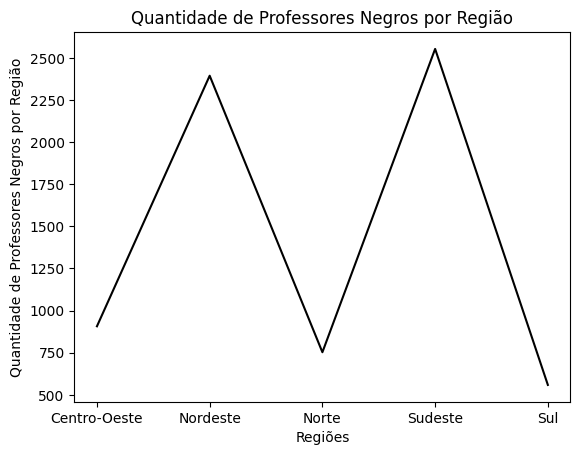

In [33]:
import matplotlib.pyplot as plt

cores = ['black']  

doc_pretos = df.groupby('NO_REGIAO_IES')['DOC_EX_PRETA'].sum()


plt.plot(doc_pretos.index, doc_pretos.values, color=cores[0])

plt.title('Quantidade de Professores Negros por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Professores Negros por Região')
plt.savefig('professorpreto.png')
plt.show()


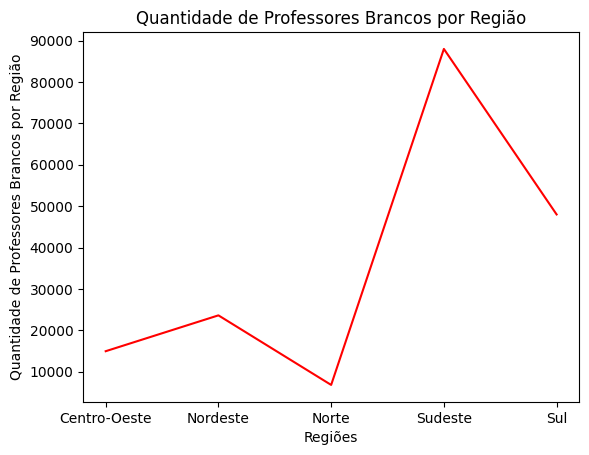

In [37]:
import matplotlib.pyplot as plt

cores = ['red']  

doc_branca = df.groupby('NO_REGIAO_IES')['DOC_EX_BRANCA'].sum()


plt.plot(doc_branca.index, doc_branca.values, color=cores[0])

plt.title('Quantidade de Professores Brancos por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Professores Brancos por Região')
plt.savefig('professorbranco.png')
plt.show()

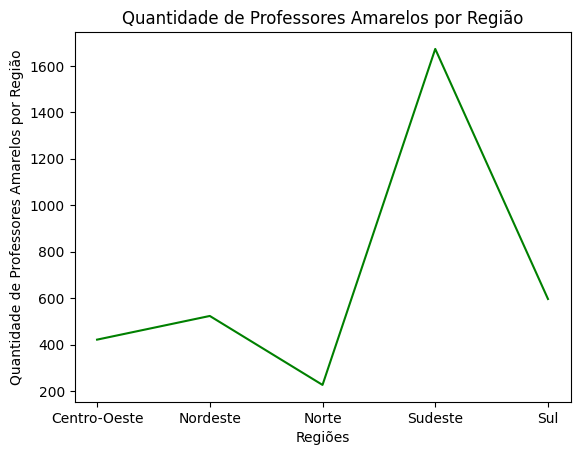

In [38]:
import matplotlib.pyplot as plt

cores = ['green']  

doc_amarela = df.groupby('NO_REGIAO_IES')['DOC_EX_AMARELA'].sum()


plt.plot(doc_amarela.index, doc_amarela.values, color=cores[0])

plt.title('Quantidade de Professores Amarelos por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Professores Amarelos por Região')
plt.savefig('professoramarelo.png')
plt.show()

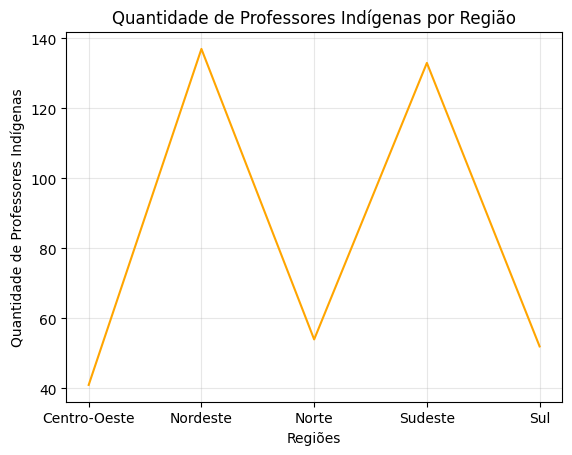

In [34]:
import matplotlib.pyplot as plt

cores = ['orange']  

doc_indigenas = df.groupby('NO_REGIAO_IES')['DOC_EX_INDÍGENA'].sum()

plt.plot(doc_indigenas.index, doc_indigenas.values, color=cores[0])

plt.title('Quantidade de Professores Indígenas por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Professores Indígenas')
plt.grid(True, alpha=0.3)
plt.savefig('professorigenas.png')
plt.show()


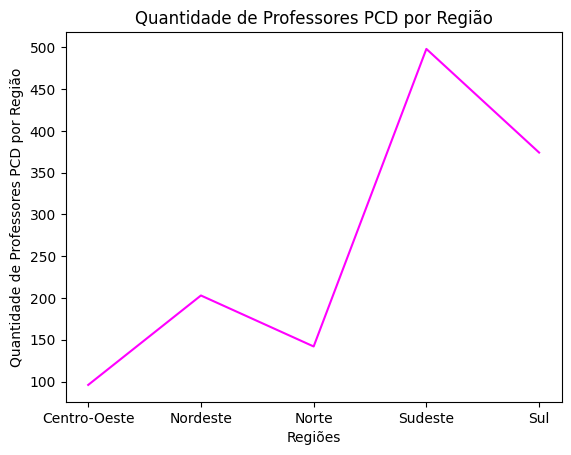

In [39]:
import matplotlib.pyplot as plt

cores = ['magenta'] 
doc_pcd = df.groupby('NO_REGIAO_IES')['DOC_EX_COM_DEFICIÊNCIA'].sum()


plt.plot(doc_pcd.index, doc_pcd.values, color=cores[0])

plt.title('Quantidade de Professores PCD por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Professores PCD por Região')
plt.savefig('professorpcd.png')
plt.show()

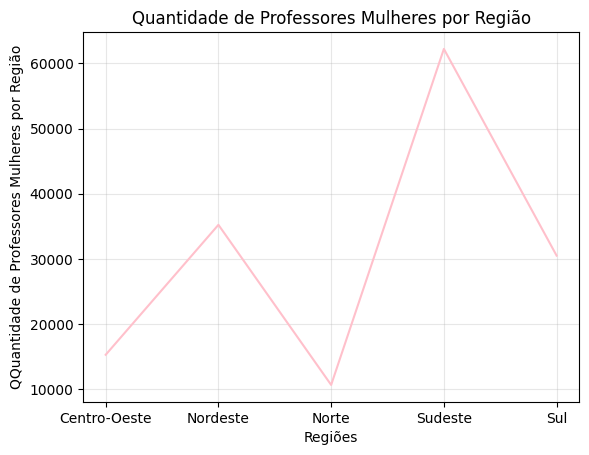

In [35]:
import matplotlib.pyplot as plt

cores = ['pink']  

doc_fem = df.groupby('NO_REGIAO_IES')['DOC_EX_FEMI'].sum()


plt.plot(doc_fem.index, doc_fem.values, color=cores[0])

plt.title('Quantidade de Professores Mulheres por Região')
plt.xlabel('Regiões')
plt.ylabel('QQuantidade de Professores Mulheres por Região')
plt.grid(True, alpha=0.3)
plt.savefig('professorfem.png')
plt.show()

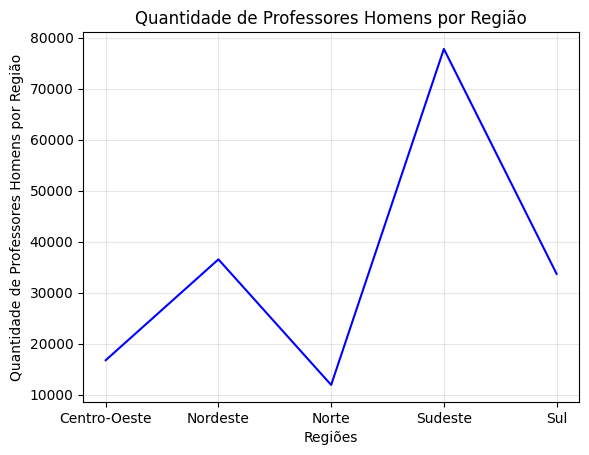

In [36]:
import matplotlib.pyplot as plt

cores = ['blue'] 

doc_masc = df.groupby('NO_REGIAO_IES')['DOC_EX_MASC'].sum()


plt.plot(doc_masc.index, doc_masc.values, color=cores[0])

plt.title('Quantidade de Professores Homens por Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de Professores Homens por Região')
plt.grid(True, alpha=0.3)
plt.savefig('professormasc.png')
plt.show()


In [6]:
from fpdf import FPDF

# p = retrato, l = paisagem
# mm, cm, in
# a3, a4, a5, letter e legal

pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()

# b, i, u

pdf.set_font('Arial', 'B', 16)

# Título no topo do PDF
titulo_topo = "Trabalho Final de Python - Turma F Sou Kick! - Bianca Carla Martinelli"
pdf.cell(200, 10, align='C', txt=titulo_topo, ln=True)
pdf.ln(10)

pdf.set_font('Arial', 'B', 18)

# Título antes da breve apresentação
titulo_analise = "ANÁLISE DA DESIGUALDADE NA EDUCAÇÃO BRASILEIRA"
pdf.cell(200, 10, align='C', txt=titulo_analise, ln=True)
pdf.ln(5)

pdf.set_font('Arial', '', 12)

# Breve apresentação
apresentacao = "Este PDF apresenta informações sobre diferentes aspectos dos professores por região. Cada seção contém dados específicos sobre professores de diferentes grupos étnicos, gêneros e deficiências."

pdf.multi_cell(0, 10, txt=apresentacao, align='C')
pdf.ln(20)

# Lista de títulos e imagens
titulos = ['Professores por região', 'Professores Brancos', 'Professores Pretos', 'Professores Indígenas', 'Professores Amarelos', 'Professores com Deficiência', 'Professores Homens', 'Professores Mulheres']
imagens = ['img/professoresregiao.png', 'img/professorbranco.png', 'img/professorpreto.png', 'img/professorigenas.png', 'img/professoramarelo.png', 'img/professorpcd.png', 'img/professormasc.png', 'img/professorfem.png']

# Largura maior para as imagens
largura_imagem = 150

# Itera sobre os títulos e imagens
for titulo, imagem in zip(titulos, imagens):
    pdf.set_font('Arial', 'B', 14)  # Fonte maior e negrito para os títulos dos gráficos
    pdf.cell(200, 10, align='C', txt=titulo, ln=True)

    # Calcula a posição central para a imagem
    largura_pagina = pdf.w
    posicao_central = (largura_pagina - largura_imagem) / 2
    
    # Calcula a posição de x para a imagem
    x_imagem = pdf.w / 2 - largura_imagem / 2

    # Coloca a imagem centralizada abaixo do título
    pdf.image(name=imagem, x=x_imagem, y=None, w=largura_imagem)

    # Adiciona espaço entre os títulos e imagens
    pdf.ln(10)
    pdf.add_page()  # Adiciona uma nova página

pdf.output('trabalhofinalpython-BiancaMartinelli.pdf')
print("pdf salvo")


pdf salvo
